# FinMind + backtesting + talib

#### Talib is used to analyze stock and shows the related indexes. 
#### FinMind is used to get the data from the Taiwan market.

In [1]:
from FinMind.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id='0050', start_date='2003-01-01', end_date='2023-02-25')

df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
df = df.rename(columns={"Trading_Volume": "Volume"})
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))

# FinMind API

In [2]:
token = pd.read_csv(r"C:\Users\Wade\Desktop\Jupyter_Python\finMindToken.txt")

In [3]:
import requests
url = "https://api.web.finmindtrade.com/v2/user_info"
payload = {
    "token": token, # 參考登入，獲取金鑰
}
resp = requests.get(url, params=payload)
resp.json()["user_count"]  # 使用次數
resp.json()["api_request_limit"]  # api 使用上限

6000

### Real time

In [10]:
url = "https://api.finmindtrade.com/api/v4/taiwan_futures_snapshot"
parameter = {
    "dataset": "taiwan_futures_snapshot",
    "data_id": "TXFE4",
    "token": token, # 參考登入，獲取金鑰
}


resp = requests.get(url, params=parameter)
data = resp.json()

In [11]:
resp.json()

{'msg': 'success',
 'status': 200,
 'data': [{'open': 20834.0,
   'high': 20984.0,
   'low': 20827.0,
   'close': 20948.0,
   'change_price': 136.0,
   'change_rate': 0.65,
   'average_price': 20920.42,
   'volume': 1,
   'total_volume': 61955,
   'amount': 20948,
   'total_amount': 1296124411,
   'yesterday_volume': 52588,
   'buy_price': 20944.0,
   'buy_volume': 5,
   'sell_price': 20948.0,
   'sell_volume': 8,
   'volume_ratio': 1.18,
   'date': '2024-05-11 04:59:56.092',
   'futures_id': 'TXFE4',
   'TickType': 1}]}

In [12]:
8/5

1.6

In [11]:
resp.json()

{'msg': 'success',
 'status': 200,
 'data': [{'open': 20655.0,
   'high': 20684.0,
   'low': 20609.0,
   'close': 20656.0,
   'change_price': 8.0,
   'change_rate': 0.04,
   'average_price': 20647.54,
   'volume': 6,
   'total_volume': 29787,
   'amount': 123936,
   'total_amount': 615028418,
   'yesterday_volume': 32445,
   'buy_price': 20656.0,
   'buy_volume': 1,
   'sell_price': 20657.0,
   'sell_volume': 4,
   'volume_ratio': 0.92,
   'date': '2024-05-07 23:38:54.499',
   'futures_id': 'TXFE4',
   'TickType': 2}]}

### Indicator: CnnFearGreedIndex

In [4]:
url = "https://api.finmindtrade.com/api/v4/data?"
parameter = {
    "dataset": "CnnFearGreedIndex",
    "data_id": "2330",
    "start_date":"2024-04-01",
    "end_date":None,
    "token": token, 
}


resp = requests.get(url, params=parameter)
data = resp.json()

{'msg': 'success', 'status': 200, 'data': [{'date': '2024-04-01', 'fear_greed': 67, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-02', 'fear_greed': 62, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-03', 'fear_greed': 63, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-04', 'fear_greed': 58, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-05', 'fear_greed': 62, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-08', 'fear_greed': 62, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-09', 'fear_greed': 54, 'fear_greed_emotion': 'neutral'}, {'date': '2024-04-10', 'fear_greed': 51, 'fear_greed_emotion': 'neutral'}, {'date': '2024-04-11', 'fear_greed': 46, 'fear_greed_emotion': 'neutral'}, {'date': '2024-04-12', 'fear_greed': 46, 'fear_greed_emotion': 'neutral'}, {'date': '2024-04-15', 'fear_greed': 39, 'fear_greed_emotion': 'fear'}, {'date': '2024-04-16', 'fear_greed': 37, 'fear_greed_emotion': 'fear'}, {'date': '2024-04-17', 'fear_greed': 34, 'fear_greed_emotion': 'fear'}, {'d

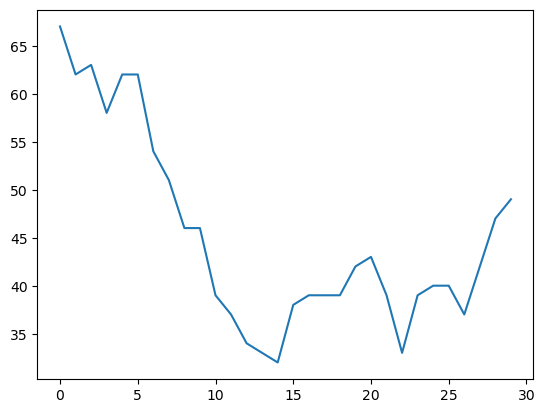

In [5]:
print(data)
fear_greed = [i["fear_greed"] for i in data["data"]]
plt.plot(fear_greed)

### History data

In [23]:
api = DataLoader()
api.login_by_token(api_token=token)
# api.login(user_id='user_id',password='password')
df = api.taiwan_futures_tick(
    futures_id='MTX',
    date='2024-05-11'
)

In [17]:
df[df["date"]=="2020-05-12 03:59:02"]

,contract_date,date,futures_id,price,volume


In [42]:
df['contract_date'].unique()

array(['202405', '202406', '202407', '202412', '202409', '202405W4',
       '202503', '202405/202406'], dtype=object)

In [31]:
tmp_test  =  df[(df["date"]>"2024-05-11 04:59:00")&(df["contract_date"]=='202405')]

In [43]:
for i in df.iloc[:]:
    print(i)

contract_date
date
futures_id
price
volume


In [52]:
tmp_test["volume"].unique() #.iloc[-30:]

array([ 2,  4,  8, 24,  6, 32], dtype=int64)

MovieWriter ffmpeg unavailable; using Pillow instead.


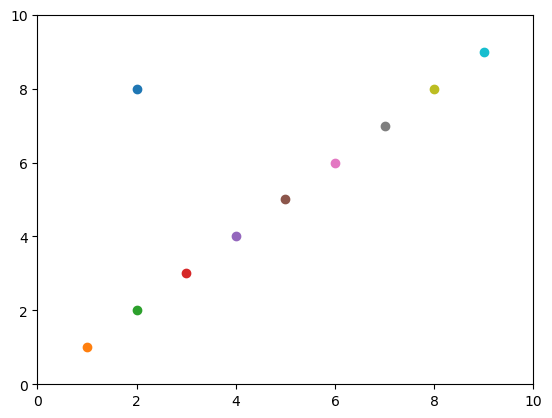

In [53]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()  # 建立單一圖表
ax.set_xlim(0,10)         # 設定 x 軸範圍 0～10
ax.set_ylim(0,10)         # 設定 y 軸範圍 0～10

def init():
    ax.scatter(2, 8)      # 一開始要執行的韓式，在 (2,8) 的位置畫點

def run(data):
    if data>0:
        ax.scatter(data, data)    # 如果資料大於 0，就在圖表上畫點
    else:
        pass

ani = animation.FuncAnimation(fig, run, frames=10, interval=10, init_func=init)  # 製作動畫
# ani.save('animation.gif', fps=10)   # 儲存為 gif
plt.show()

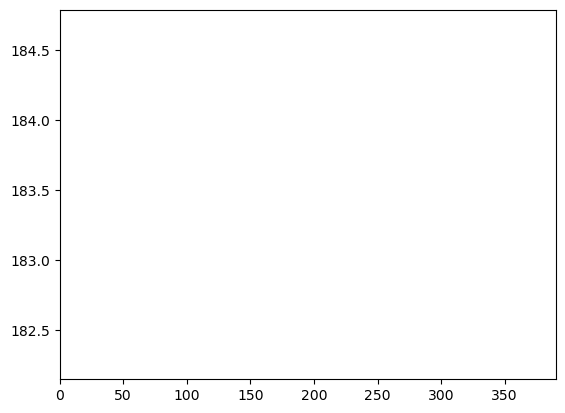

In [57]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import datetime

# 获取股票数据
symbol = 'AAPL'  # 选择您感兴趣的股票代码
stock = yf.Ticker(symbol)
history = stock.history(period='1d', interval='1m')  # 获取最近一天的分钟级别历史数据

# 创建动态图
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def init():
    ax.set_xlim(0, len(history))
    ax.set_ylim(history['Close'].min(), history['Close'].max())
    return line,

def update(frame):
    x = range(len(history))
    y = history['Close']
    line.set_data(x, y)
    ax.set_xlim(0, len(history))
    ax.set_ylim(history['Close'].min(), history['Close'].max())
    ax.set_title(f'{symbol} 实时股价 - {datetime.datetime.now().strftime("%H:%M:%S")}')
    return line,

ani = FuncAnimation(fig, update, frames=range(len(history)), init_func=init, blit=True, interval=60000)  # 更新频率为每分钟

plt.show()

In [56]:
plt.show()